# Conducting and Analysis of an A/B Test

**Description of the project**

For a large online store, there are several possible points of growth and revenue increase. In collaboration with the marketing department, several hypotheses were selected about the potential development of the resource and the growth of revenue, and the increase in business metrics.

The aim of the project: To prioritize hypotheses and choose the most appropriate hypothesis for conducting an A/B test.

After the A / B - test, it is necessary to conduct a statistical hypothesis test and decide whether to confirm or accept an alternative hypothesis.

**Project Structure**
1. Prioritization of hypotheses<br/>
<br/>
- Check the data frame with hypotheses using the ICE framework <br/>
- Check the data frame with hypotheses using the RICE framework <br/>
- Let's choose the highest priority hypothesis <br/>
2. A/B test analysis:<br/>
- Analysis of the average bill in groups<br/>
- Analysis of revenue in groups<br/>
- Analysis of conversion in groups<br/>
- Search for anomalies in the data frame<br/>
- Calculation of statistical significance from raw data<br/>
- Calculation of statistical significance from filtered data<br/>
3. Conclusions about the test results

## Приоритизация гипотез

*Calling the libraries we need*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats as st
import math as mt
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings
from matplotlib.pyplot import figure

*Let's consider the dataset with hypotheses*

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/dataf/hypothesis.csv')

In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Dataframe content**
Hypothesis - a brief description of the hypothesis;<br/>
Reach — reach of users on a 10-point scale;<br/>
Impact - impact on users on a 10-point scale;<br/>
Confidence - confidence in the hypothesis on a 10-point scale;<br/>
Efforts - the cost of resources to test the hypothesis on a 10-point scale. The larger the Efforts value, the more expensive it is to test the hypothesis.

*Let's convert the column names to lowercase*

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


*Let's prioritize hypotheses. Let's use the ICE framework to prioritize hypotheses. After we will sort them in descending order of priority.* 

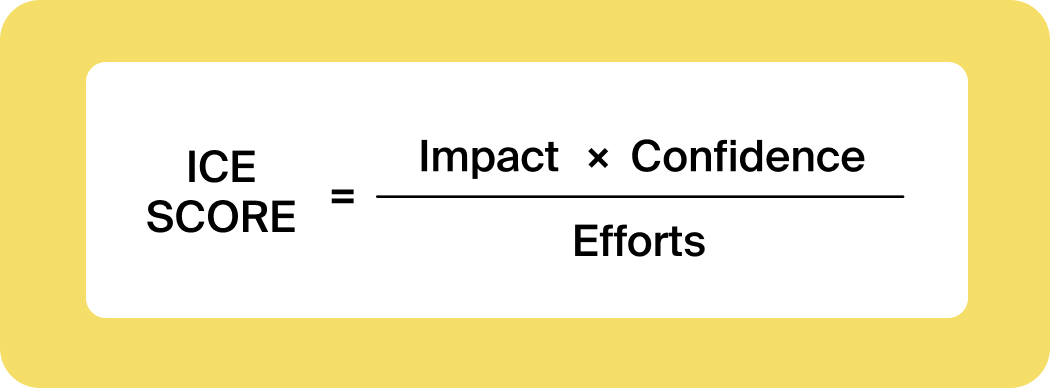

In [8]:
data['ICE'] = ((
    data['impact'] * data['confidence'])/data['efforts'])

display(data[['hypothesis','ICE']].sort_values(by='ICE', ascending = False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


*As you can see, according to this criterion, we have three leaders: 9, 1, and 8 hypotheses. Now let's take an example of the RICE framework for prioritizing hypotheses. We will sort them in descending order of priority.*

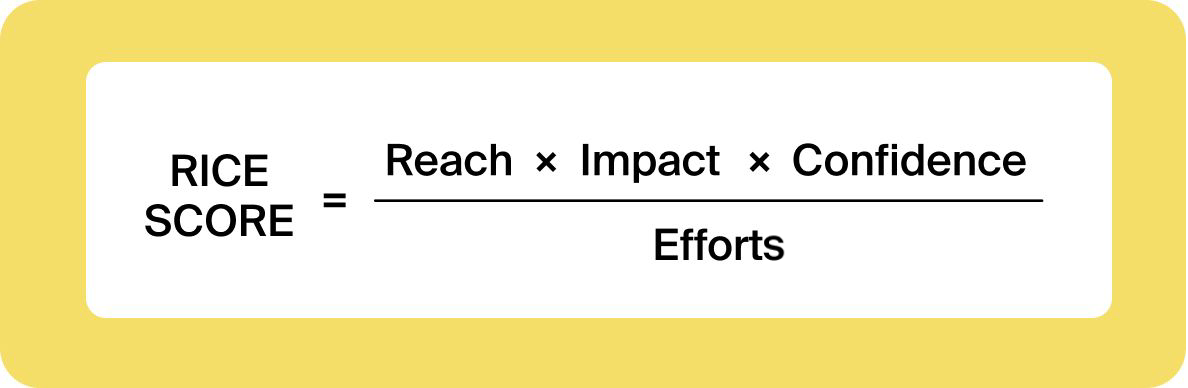

In [9]:
data['RICE'] = ((
    data['reach']*data['impact'] * data['confidence'])/data['efforts'])

display (data[['hypothesis','RICE']].sort_values(by='RICE', ascending = False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [10]:
data.sort_values(by=['RICE','ICE'], ascending = False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


<div style="border:solid green 2px; padding: 20px">
    
**Conclusions:**
    
 When adding the "Reach" parameter, the 8th hypothesis about the Internet subscription to the newsletter breaks ahead, since it will affect 100% of users, but the birthday promotion hypothesis will affect a very small number of users, adding "recommendation blocks" has a low impact on users. the hypothesis about new channels of attraction is consistently in the top three. <br/>
We make a decision that we will run an A / B test on the hypothesis "Add a subscription form to all main pages to collect a customer base for email newsletters"
```
H_0: The average metrics before and after the implementation of the newsletter subscription form have not changed`
H_a: The average metrics before and after the implementation of the newsletter subscription form are different`
alpha = 0.05
```

## A/B test analysis

*We received the test results in two data frames "orders" and "visitors", let's call them to get acquainted:*

In [11]:
orders, visitors = (
    pd.read_csv('/content/drive/MyDrive/dataf/orders.csv'),  
    pd.read_csv('/content/drive/MyDrive/dataf/visitors.csv')  
   
)

In [12]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [13]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


**Data Description**<br/>
*orders*<br/>
transactionId — order identifier;<br/>
visitorId — identifier of the user who made the order;<br/>
date — the date when the order was made;<br/>
revenue — order revenue;<br/>
group — the A/B test group the order is in.<br/>
<br/>
*visitors*<br/>
date — date;<br/>
group — A/B test group;<br/>
visitors — number of users on the specified date in the specified A/B test group<br/>

In [14]:
print(visitors.info()),
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


*from preprocessing: we need to rename columns and change data types. It can be seen that the dataframes do not contain gaps, we will also check them for duplicates:*

In [15]:
orders.columns= ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [16]:
orders.head(2)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B


*Let's cast data columns to datetime type* 

In [17]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
 
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
 
    

In [18]:
print(visitors.info()),
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None


In [19]:
print('Number of duplicates in visitors {}'.format(visitors.duplicated().mean())),
print ('Number of duplicates in orders {}'.format(orders.duplicated().mean()));

Number of duplicates in visitors 0.0
Number of duplicates in orders 0.0


*Let's get the test period*

In [20]:
print('A/B test started at {}'.format(visitors['date'].min())),
print('A/B test finished at {}'.format(visitors['date'].max())),
print('A/B test lasts {}'.format(visitors['date'].max() - visitors['date'].min()))

A/B test started at 2019-08-01 00:00:00
A/B test finished at 2019-08-31 00:00:00
A/B test lasts 30 days 00:00:00


**No duplicates found, dates adjusted: pre-processing completed, let's start calculations**

### Calculation of cumulative revenue

1. Let's create a dates_groups dataframe with unique value pairs 'date' and 'group', of the orders table. Get rid of duplicates with the drop_duplicates() method.
2. Let's declare the orders_aggregated variable containing:
date;
A/B test group;
the number of unique orders in the test group up to and including the specified date;
the number of unique users who made at least 1 order in the test group up to and including the specified date;
the total revenue of orders in the test group up to and including the specified date.
3. Let's declare a variable visitors_aggregated containing:
date;
A/B test group;
the number of unique visitors in the test group up to and including the specified date.

In [21]:
dates_groups = orders[['date', 'group']].drop_duplicates()

orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])


4. Let's define the cumulative_data variable by combining orders_aggregated and visitors_aggregated by 'date', 'group' columns using the merge() method
5. Let's declare the variables cumulative_revenue_a and cumulative_revenue_b, in which we will save data on dates, revenue and the number of orders in groups A and B.

In [22]:
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulative_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulative_revenue_a = cumulative_data [cumulative_data['group'] == 'A'][['date','revenue', 'orders']]
cumulative_revenue_b = cumulative_data [cumulative_data['group'] == 'B'][['date','revenue', 'orders']]

*Let's plot a graph of cumulative revenue by groups*

''

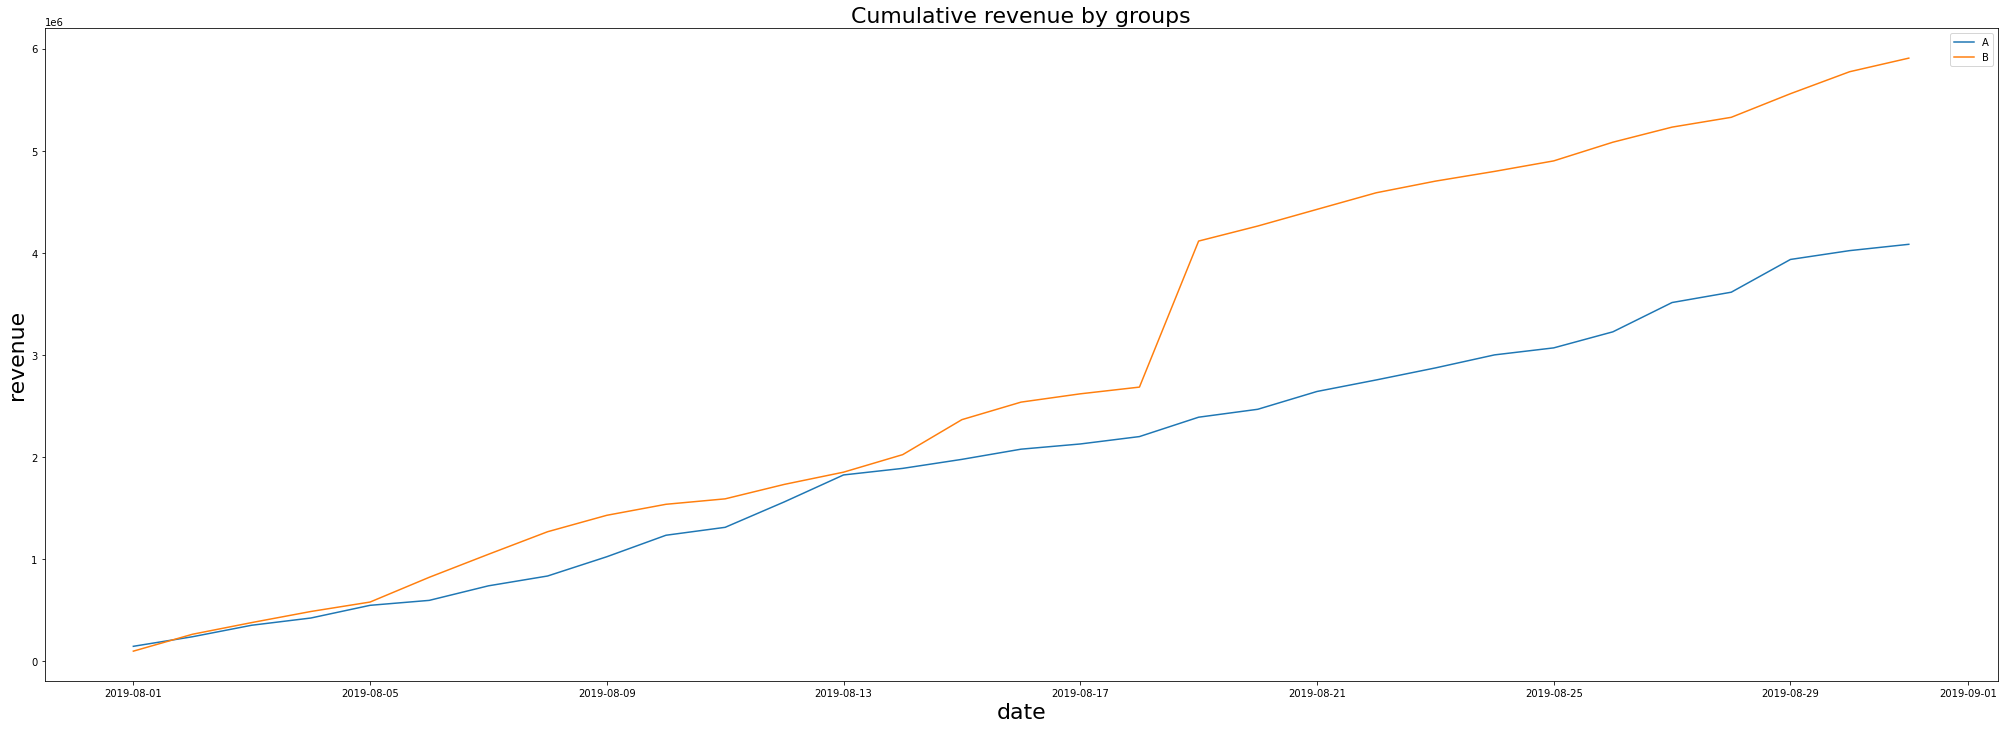

In [23]:

fig = plt.figure()
fig.set_figwidth(35)
fig.set_figheight(12)
ax = fig.add_subplot(1, 1, 1)
# plotting group A
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
 
# plotting group B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.legend() 
plt.xlabel('date', fontsize = 22, color = 'Black')
plt.ylabel('revenue', fontsize = 22, color = 'Black')
plt.title('Cumulative revenue by groups',fontsize = 22, color = 'Black')
;


<div style="border:solid green 2px; padding: 20px">
    
**Conclusions:**
<br/>
The graphs clearly show a sharp increase in revenue in the tested group in the 20th of August, after August 21, the graph gradually grows upwards, as in the case of group A, however, group B significantly outperforms group A by the end of the test in terms of accumulated revenue.      

### Calculation of the cumulative average bill for groups.

*Let's plot a graph of the cumulative average bill by groups.* 

''

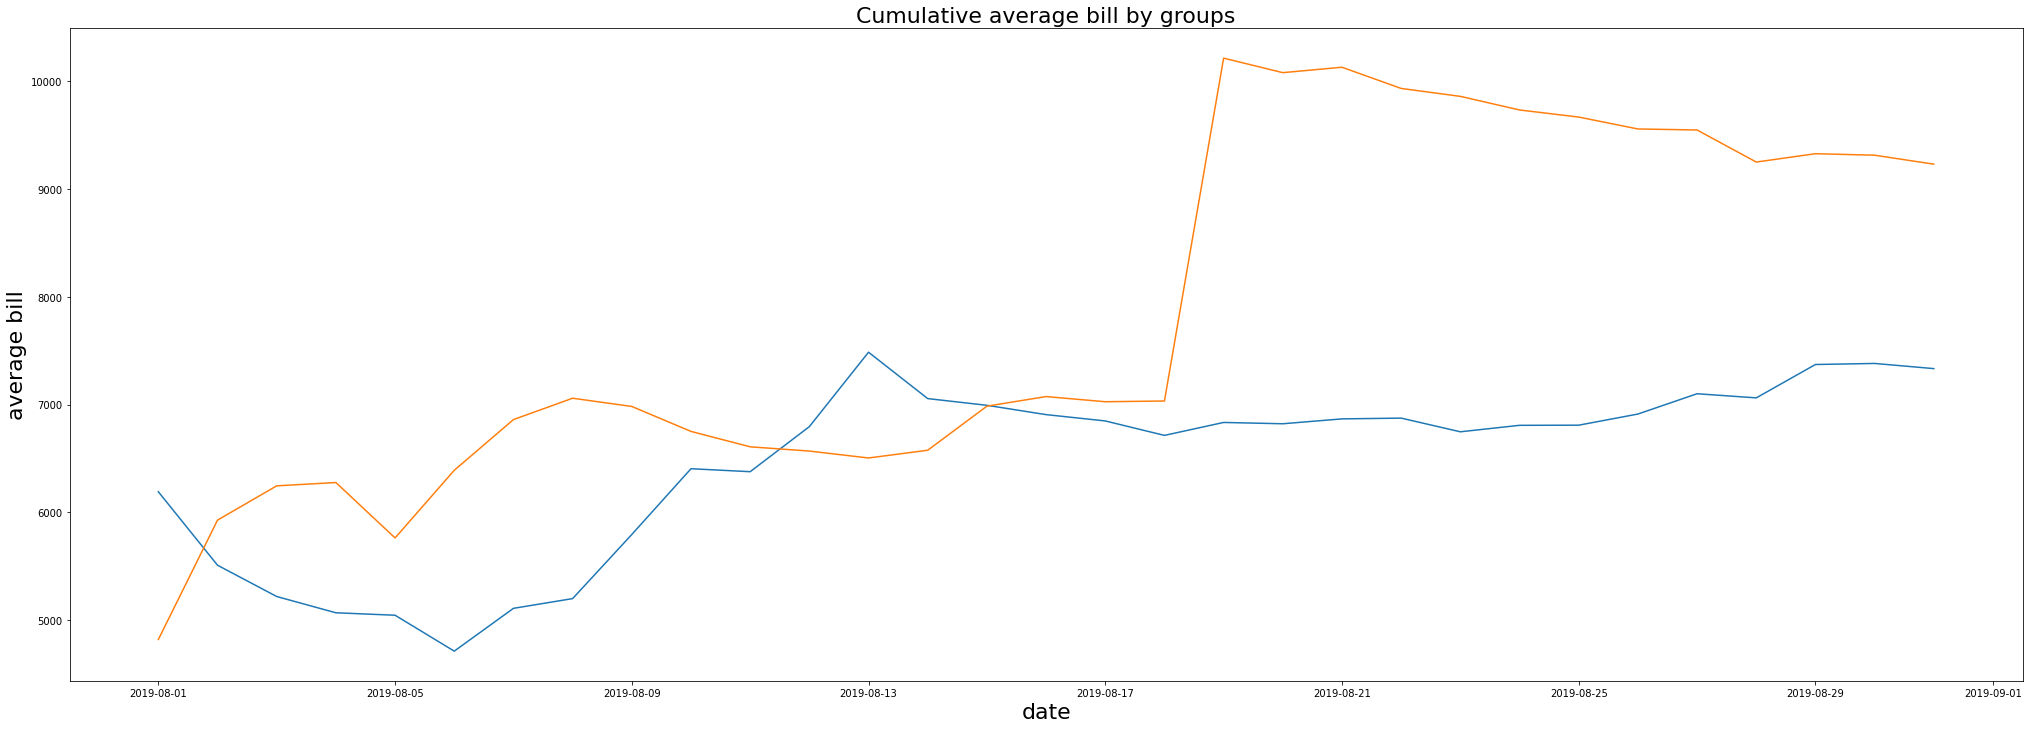

In [62]:
fig = plt.figure()
fig.set_figwidth(35)
fig.set_figheight(12)
ax = fig.add_subplot(1, 1, 1)
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.xlabel('date', fontsize = 22, color = 'Black')
plt.ylabel('average bill', fontsize = 22, color = 'Black')
plt.title('Cumulative average bill by groups',fontsize = 22, color = 'Black')
;

<div style="border:solid green 2px; padding: 20px">
    
**Conclusions:**
<br/>
According to the graph of average bill accumulation, near August 19-20, an abnormally large jump in group B is visible, and it is by this value that one group differs from another likely, if we clear this anomaly, then we will not see differences in the average ticket between groups.
    

### Расчет относительного изменения кумулятивного среднего чека

*Построим график относительного изменения кумулятивного среднего чека*

1.Объеденим таблицы cumulative_revenue_a и cumulative_revenue_b

In [25]:
merged_cumulative_revenue = cumulative_revenue_a[['date','revenue', 'orders']].merge(cumulative_revenue_b[['date','revenue', 'orders']], left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

In [26]:
merged_cumulative_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


2.Добавим столбцы сренего чека по группам

In [27]:
merged_cumulative_revenue['avg_bill_a']= merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a']

In [28]:
merged_cumulative_revenue['avg_bill_b']= merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b']

In [29]:
merged_cumulative_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b,avg_bill_a,avg_bill_b
0,2019-08-01,148579,24,101217,21,6190.791667,4819.857143
1,2019-08-02,242401,44,266748,45,5509.113636,5927.733333
2,2019-08-03,354874,68,380996,61,5218.735294,6245.836066
3,2019-08-04,425699,84,489567,78,5067.845238,6276.500000
4,2019-08-05,549917,109,581995,101,5045.110092,5762.326733


3.Построим график относительного изменения среднего чека

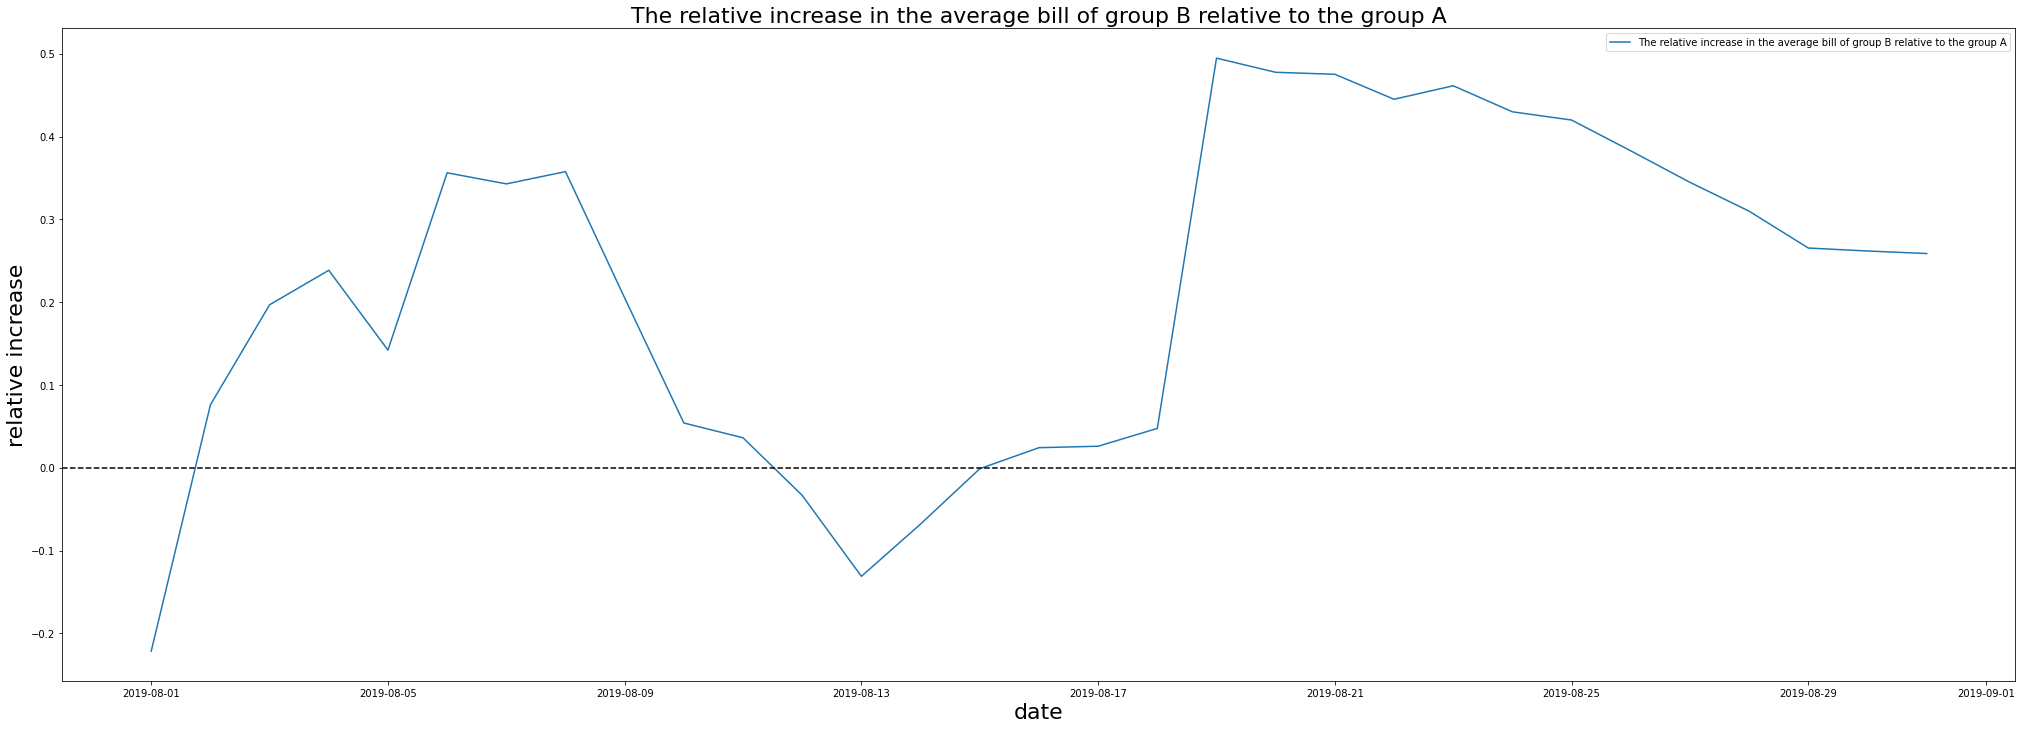

In [30]:
fig = plt.figure()
fig.set_figwidth(35)
fig.set_figheight(12)
ax = fig.add_subplot(1, 1, 1)
plt.plot(merged_cumulative_revenue['date'], merged_cumulative_revenue['avg_bill_b']/merged_cumulative_revenue['avg_bill_a']-1, label="The relative increase in the average bill of group B relative to the group A")
plt.legend()
plt.xlabel('date', fontsize = 22, color = 'Black')
plt.ylabel('relative increase', fontsize = 22, color = 'Black')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('The relative increase in the average bill of group B relative to the group A',fontsize = 22, color = 'Black');

<div style="border:solid green 2px; padding: 20px">
    
**Выводы:**
<br/>
График изменения среднего чека тестируемой группы, относительно контрольной опять четко фиксирует аномально высокий чек 20 чисел, без этой аномалии, скорее всего он бы остановился и колебался около нуля. <br/>Также подчеркиваем следующее, график относительно нестабилен, и возможно требует продолжения проведения теста.     

### Cumulative Conversion Calculation

*Let's plot a graph of cumulative conversion by groups*

1. Add a 'conversion' column to cumulative_data with the ratio of the number of orders to the number of users in the specified group on the specified day.

In [31]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

In [32]:
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


2. Let's create variables cumulative_data_a and cumulative_data_b with filtered groups.

In [33]:
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

3. Let's plot cumulative conversion graphs by groups

''

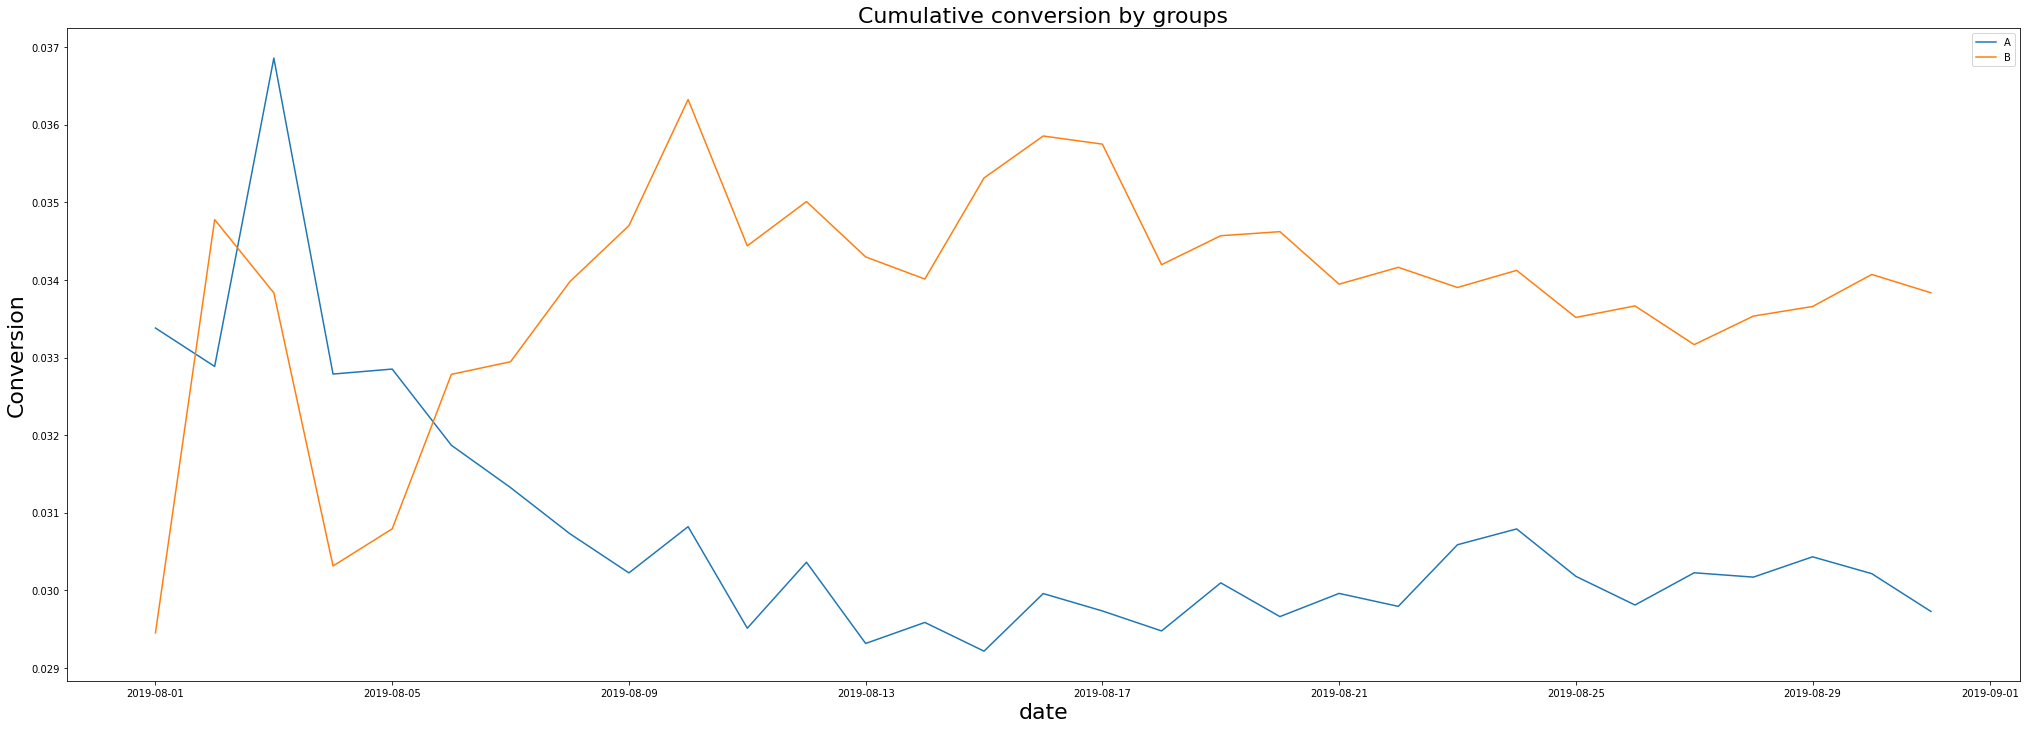

In [34]:
fig = plt.figure()
fig.set_figwidth(35)
fig.set_figheight(12)
ax = fig.add_subplot(1, 1, 1)
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()
plt.xlabel('date', fontsize = 22, color = 'Black')
plt.ylabel('Conversion', fontsize = 22, color = 'Black')
plt.title('Cumulative conversion by groups',fontsize = 22, color = 'Black')
;

<div style="border:solid green 2px; padding: 20px">
    
**Conclusions:**
     <br/>
    
In contrast to the graphs associated with the average bill, the user conversion graph by the end of the test is more stable both in the tested and in the control group. <br/> Moreover, judging by the graph, we can talk about the difference in conversion for the two groups.

### Calculation of the relative conversion change

*Построим график относительного изменения конверсии группы В к группе А*

1. Let's join cumulative_data_a and cumulative_data_b

In [35]:
merged_cumulative_coonversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['_a', '_b']) 

In [36]:
merged_cumulative_coonversions.head()

,date,conversion_a,conversion_b
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


2. Let's plot a graph of the relative change in conversion

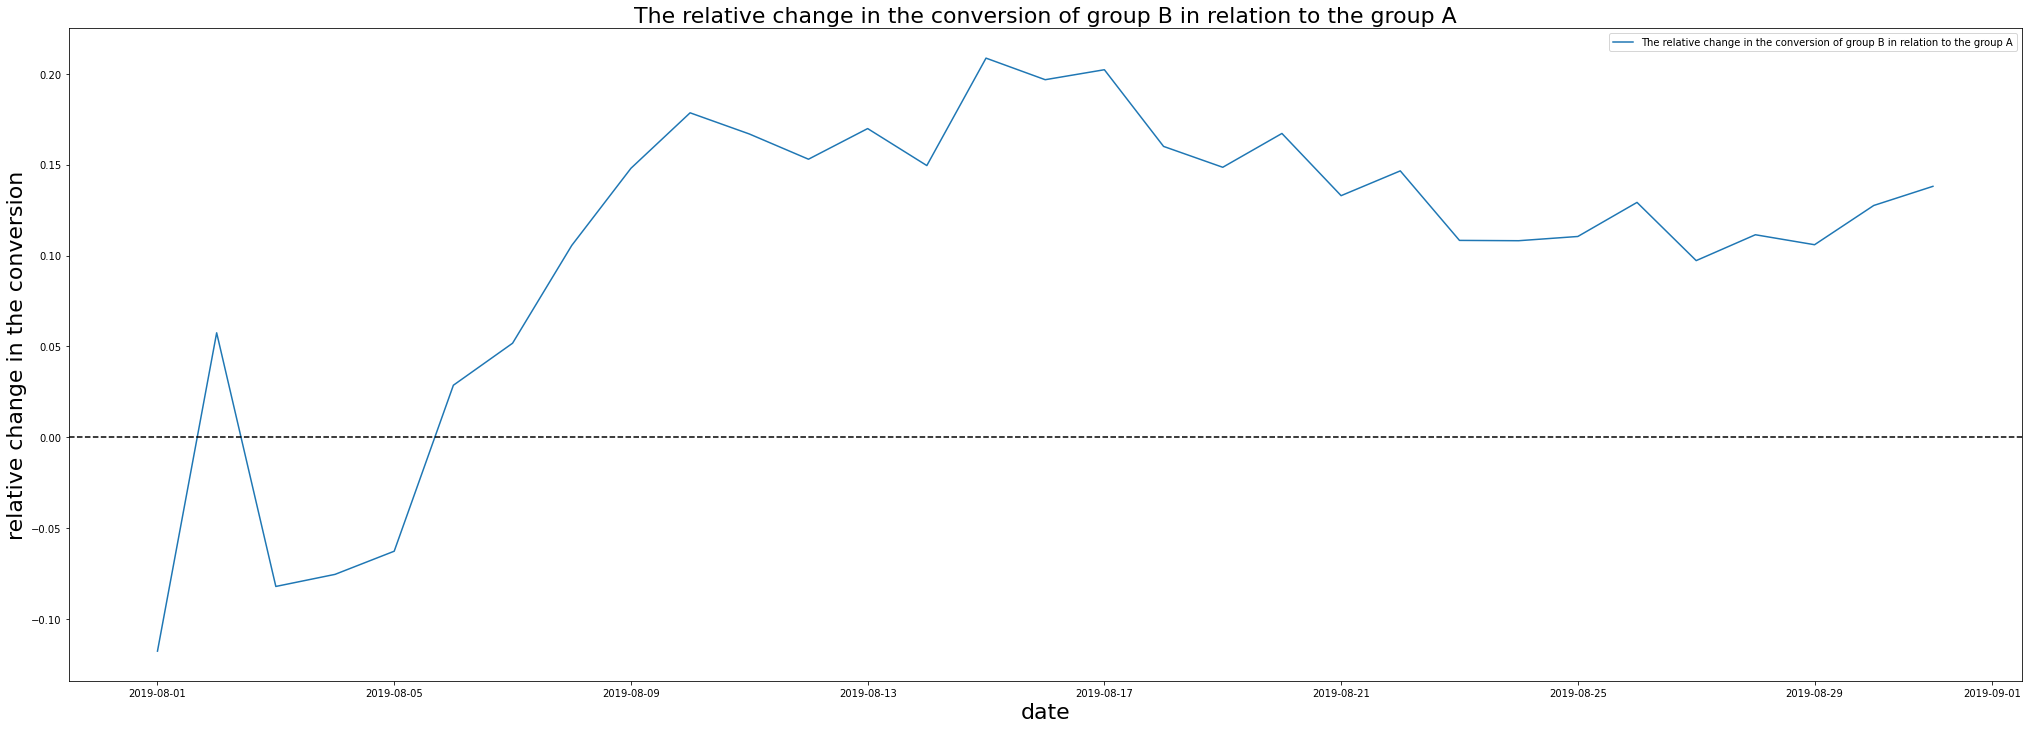

In [37]:
fig = plt.figure()
fig.set_figwidth(35)
fig.set_figheight(12)
ax = fig.add_subplot(1, 1, 1)
plt.plot(merged_cumulative_coonversions['date'], merged_cumulative_coonversions['conversion_b']/merged_cumulative_coonversions['conversion_a'] - 1, label="The relative change in the conversion of group B in relation to the group A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('date', fontsize = 22, color = 'Black')
plt.ylabel('relative change in the conversion', fontsize = 22, color = 'Black')
plt.title('The relative change in the conversion of group B in relation to the group A',fontsize = 22, color = 'Black');

<div style="border:solid green 2px; padding: 20px">
    
**Conclusions:**
     <br/>
    
As in the previous case, the relative conversion growth graph clearly shows a stable, slightly fluctuating growth.

### Calculation of data outliers

*To do this, we will group the data depending on visits and purchases*

In [38]:
orders_by_visitors = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

In [39]:
orders_by_visitors.columns = ['visitor_id', 'orders']

In [40]:
orders_by_visitors.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


*The table shows that during the test there were quite a lot of orders per user. Let's plot a histogram of the distribution of orders*

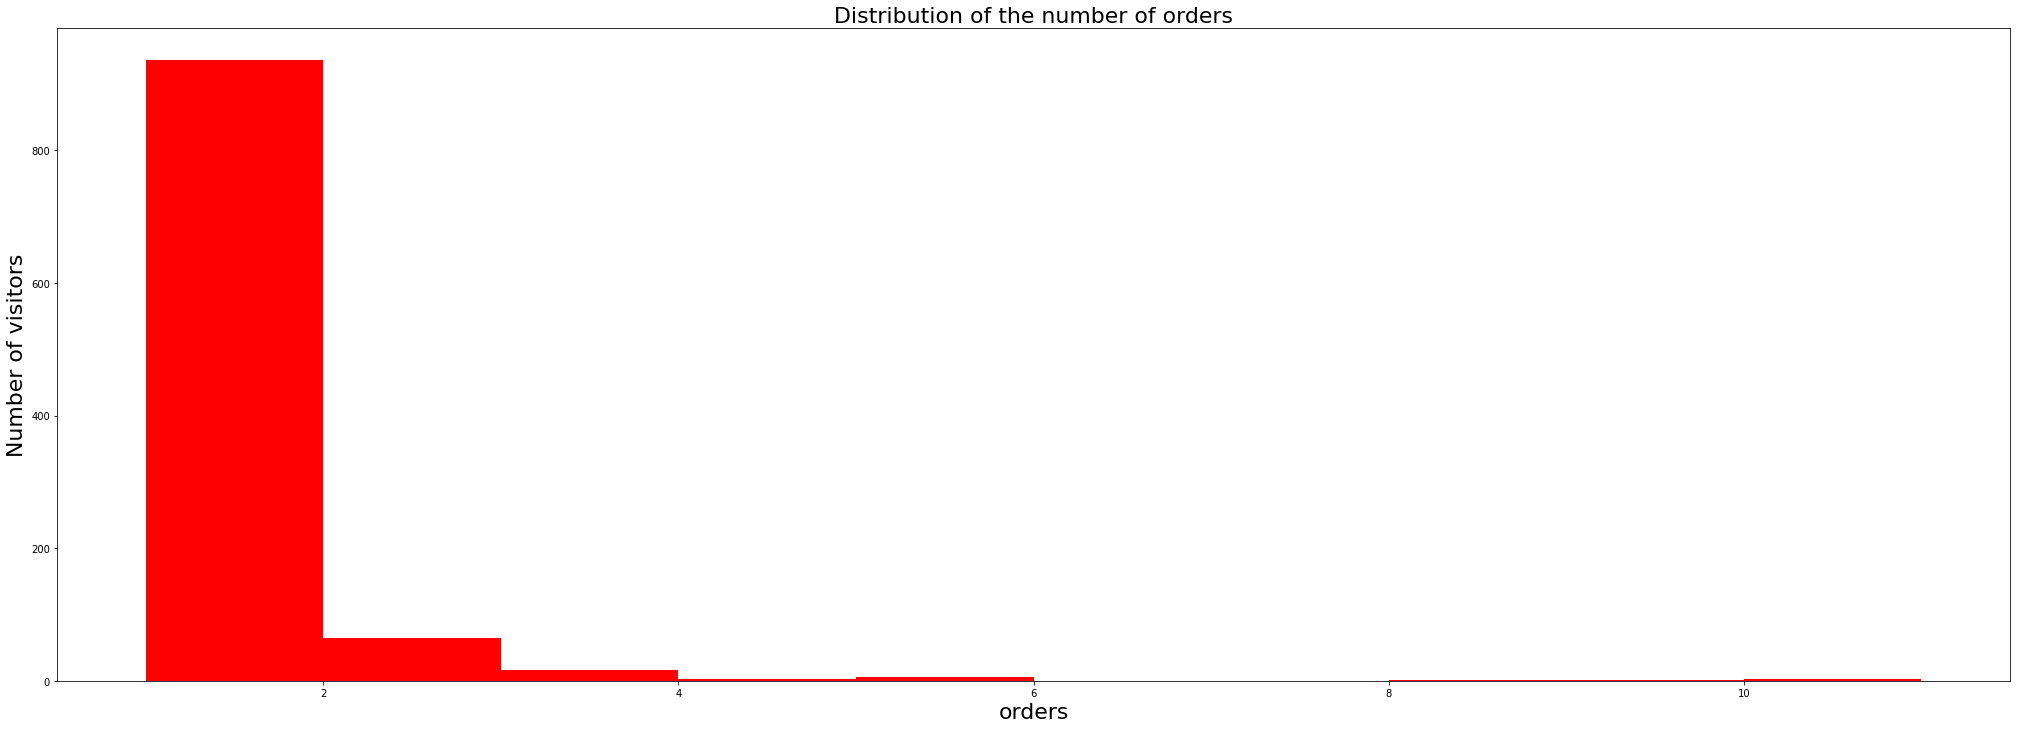

In [41]:
fig = plt.figure()
fig.set_figwidth(35)
fig.set_figheight(12)
ax = fig.add_subplot(1, 1, 1)
plt.hist(orders_by_visitors['orders'], color = 'Red')
plt.xlabel('orders', fontsize = 22, color = 'Black')
plt.ylabel('Number of visitors', fontsize = 22, color = 'Black')
plt.title('Distribution of the number of orders',fontsize = 22, color = 'Black');

*The bulk of users are limited to 1-2 orders, there is a certain number of users who have made 3-5 orders, and there are also anomalous values, in the form of 8-11 orders, we will build a scatter plot for the distribution of orders.*

*Let's construct a scatter plot for the distribution of orders*

In [42]:
x_values = pd.Series(range(0, len(orders_by_visitors)))

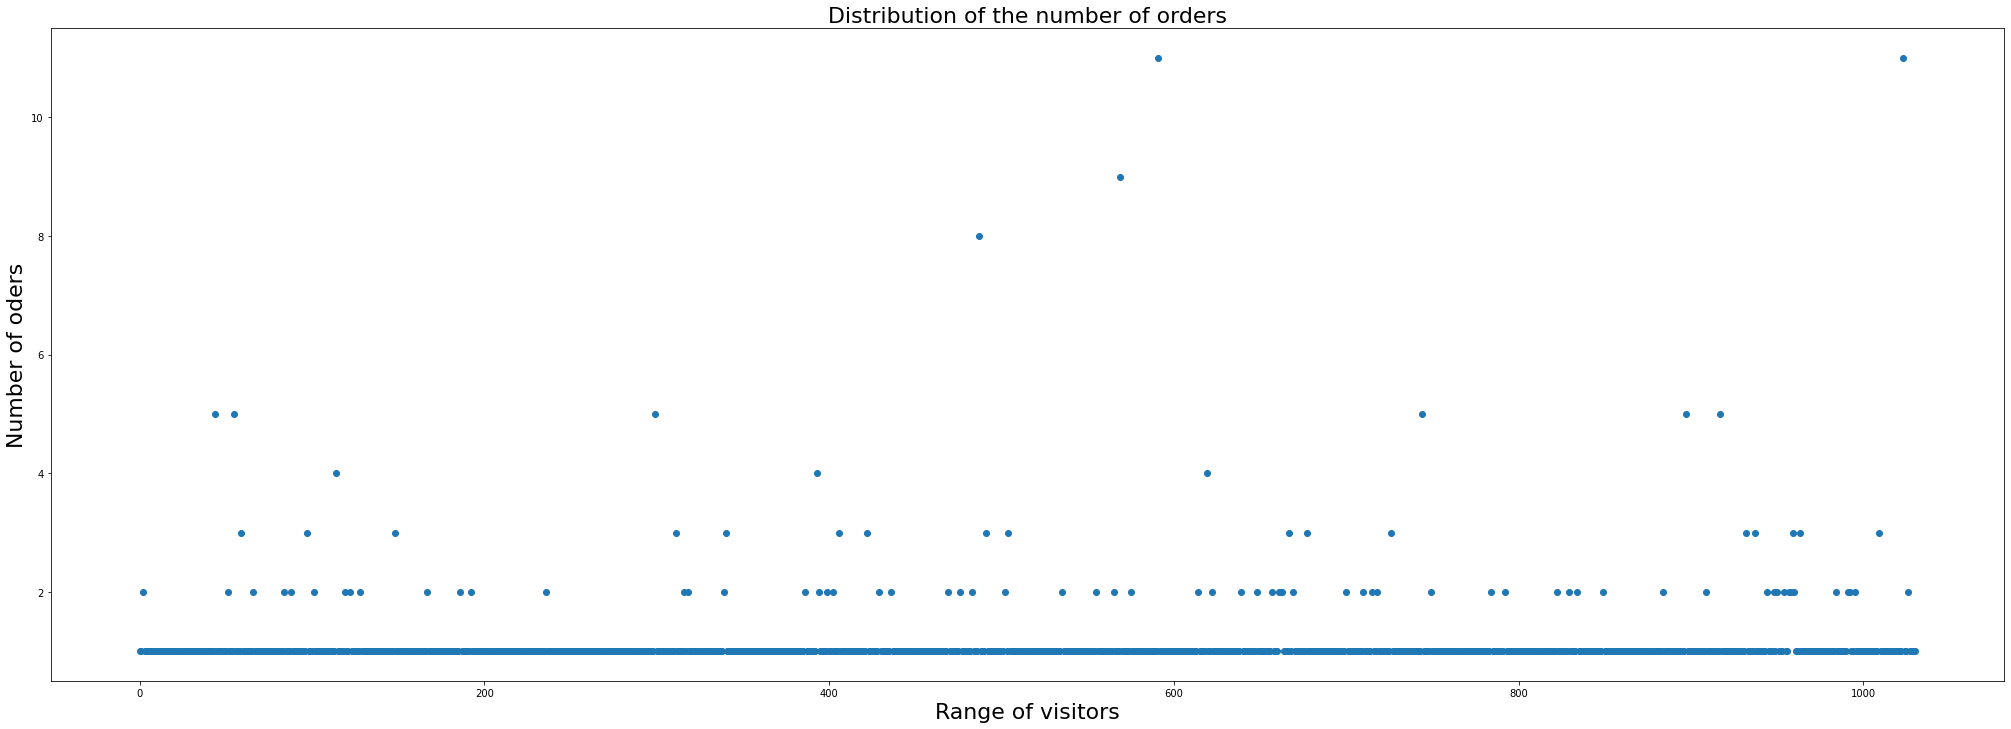

In [43]:
fig = plt.figure()
fig.set_figwidth(35)
fig.set_figheight(12)
ax = fig.add_subplot(1, 1, 1)
plt.scatter(x_values, orders_by_visitors['orders'])
plt.xlabel('Range of visitors', fontsize = 22, color = 'Black')
plt.ylabel('Number of oders', fontsize = 22, color = 'Black')
plt.title('Distribution of the number of orders',fontsize = 22, color = 'Black');

*The graph shows that even 2 orders per visitor are quite rare for the user, most likely, everything above it is an anomaly*

*Let's calculate 90th, 95th, and 99th percentiles*

In [44]:
print(' 90 percentile of the numer of oders in "orders": {}'.format(np.percentile(orders_by_visitors['orders'], 90)))
print (' 95 percentile of the numer of oders in "orders": {}'.format(np.percentile(orders_by_visitors['orders'], 95)))
print(' 99 percentile of the numer of oders in "orders": {}'.format(np.percentile(orders_by_visitors['orders'], 99)))

 90 percentile of the numer of oders in "orders": 1.0
 95 percentile of the numer of oders in "orders": 2.0
 99 percentile of the numer of oders in "orders": 4.0


*90% of users make only 1 order, and for sure, users who made more than 2 orders in a month are an anomaly and an outlier.*

*Let's consider the cost of orders in terms of anomalies*

Let's plot a histogram of order cost distribution:

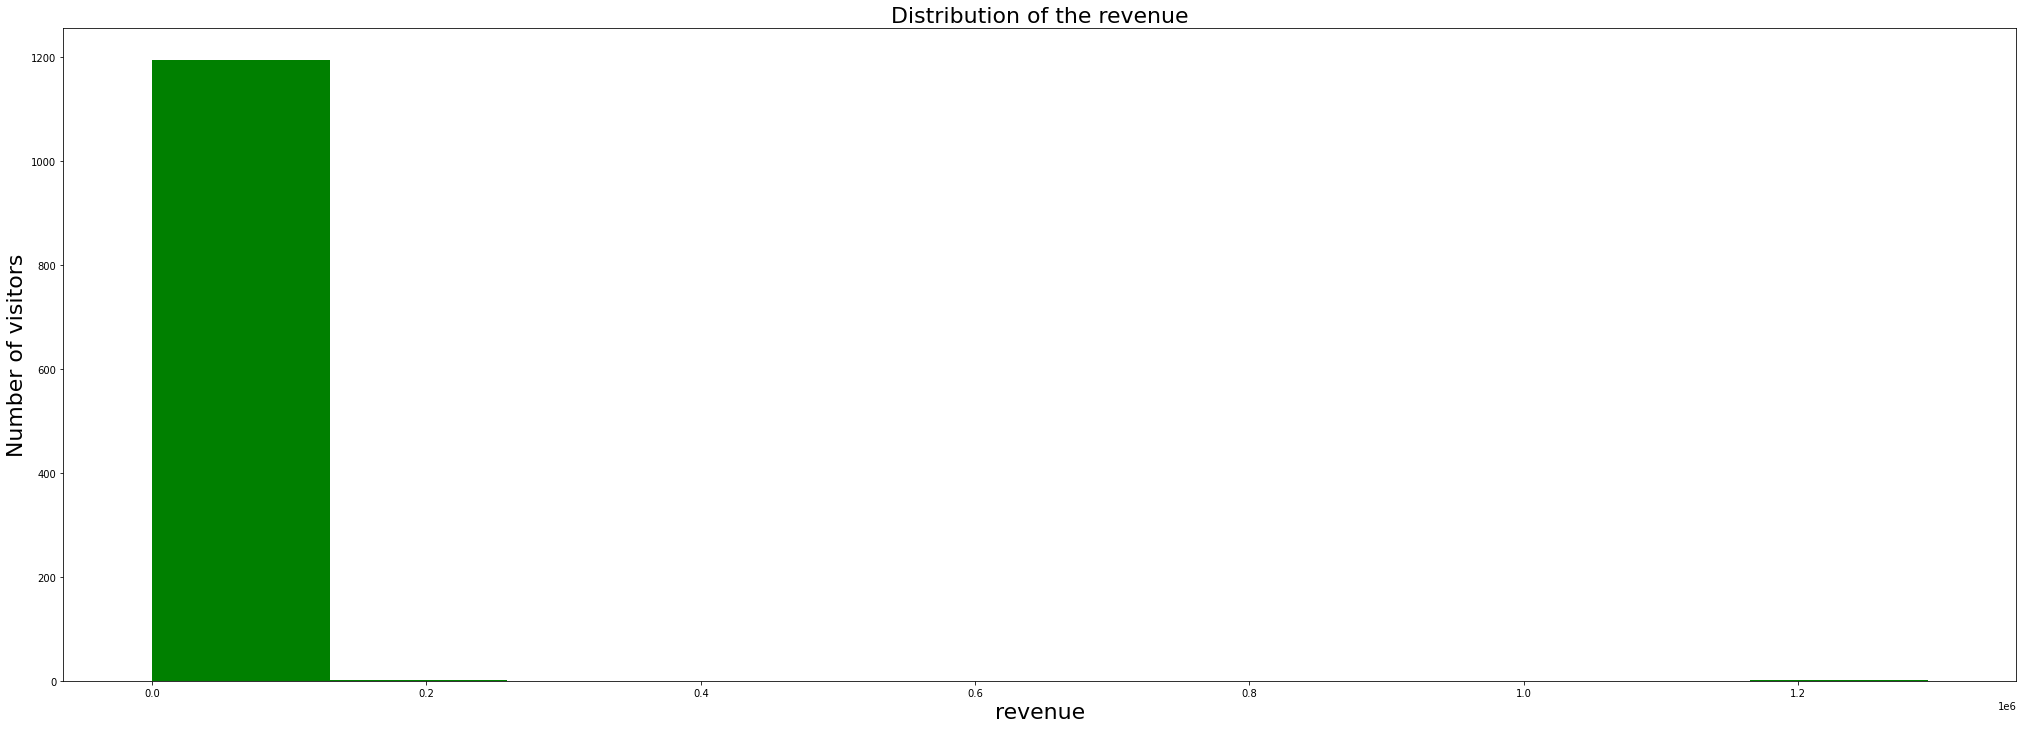

In [45]:
fig = plt.figure()
fig.set_figwidth(35)
fig.set_figheight(12)
ax = fig.add_subplot(1, 1, 1)
plt.hist(orders['revenue'], color = 'Green')
plt.xlabel('revenue', fontsize = 22, color = 'Black')
plt.ylabel('Number of visitors', fontsize = 22, color = 'Black')
plt.title('Distribution of the revenue',fontsize = 22, color = 'Black');

*According to the histogram, it can be seen that most of the revenue lies within 10,000, and there is the same anomalous order of about 120,000.*

*Let's build a scatter plot of revenue distribution*

In [46]:
x_values = pd.Series(range(0, len(orders['revenue'])))

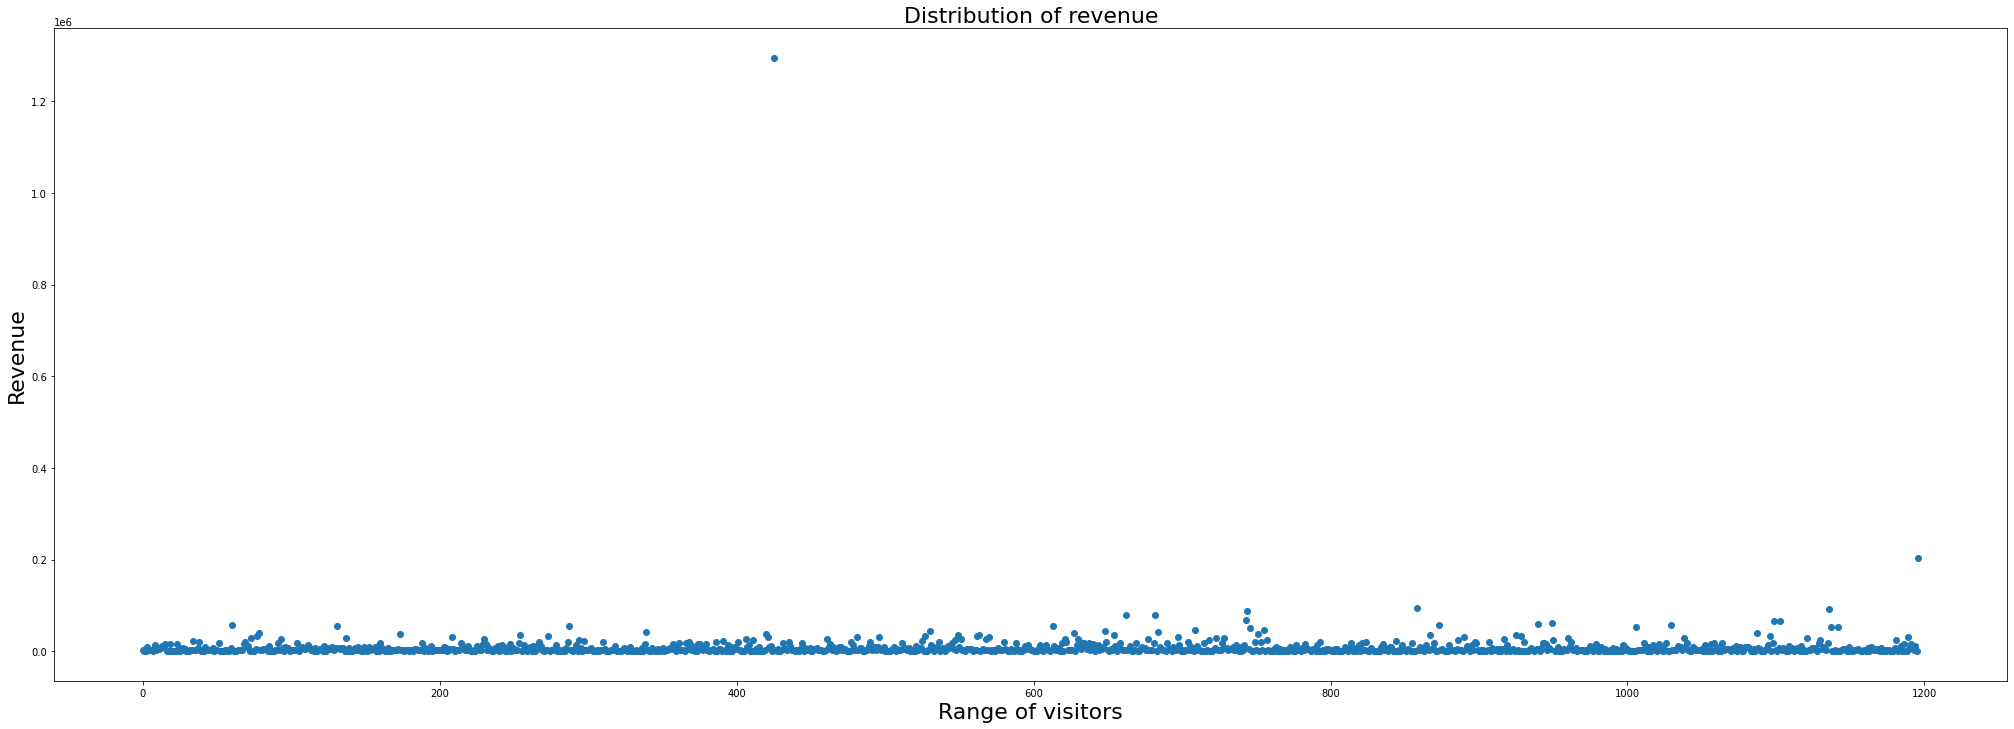

In [47]:
fig = plt.figure()
fig.set_figwidth(35)
fig.set_figheight(12)
ax = fig.add_subplot(1, 1, 1)
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Range of visitors', fontsize = 22, color = 'Black')
plt.ylabel('Revenue', fontsize = 22, color = 'Black')
plt.title('Distribution of revenue',fontsize = 22, color = 'Black');

*As can be seen from the scatter plot distribution of revenue, we see this abnormal order, which most likely gave an increase in the average bill in group B. Let's calculate the percentiles*  

In [48]:
print(' 90 percentile of revenue in orders: {}'.format(round(np.percentile(orders['revenue'], 90)),2))
print (' 95 percentile of revenue in orders: {}'.format(round(np.percentile(orders['revenue'], 95)),2))
print(' 99 percentile of revenue in orders: {}'.format(round(np.percentile(orders['revenue'], 99)),2))

 90 percentile of revenue in orders: 18168
 95 percentile of revenue in orders: 28000
 99 percentile of revenue in orders: 58233


*90% of users make an order for 18,000, 95% for 28,000. We will take all orders with revenue over 30,000 as anomalies*

<div style="border:solid green 2px; padding: 20px">
    
**Conclusions:**
     <br/>
    
After calculating the anomalies, we found that the number of orders greater than 2 and the revenue from orders greater than 30,000, both are abnormal for the results of our test. We also identified an abnormally "profitable" order for 120,000. 

### Let's test hypotheses on raw data


*Посчитаем различия в конверсии по сырым данным*

1. Let's make samples for two groups.
2. Let's group data by visits and orders

In [63]:
orders_by_visitors_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_visitors_a.columns = ['visitor_id', 'orders']

orders_by_visitors_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_visitors_b.columns = ['visitor_id', 'orders']

*3. Let's compile samples for statistical comparison of conversions*

In [64]:
sample_a = pd.concat(
    [
        orders_by_visitors_a['orders'],
        pd.Series(0, 
                  index=np.arange(
                      visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_visitors_a['orders'])
                  ), 
                  name='orders')],
    axis=0,
)
       
sample_b = pd.concat(
    [
        orders_by_visitors_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                      visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_visitors_b['orders'])
                  ), 
                  name='orders')],
    axis=0,
)

*Hypothesis test on comparison of conversions on raw data:*
```
H_0: The average conversion rates before and after the implementation of the newsletter subscription form did not change`
H_a: The average conversion rates before and after the implementation of the newsletter subscription form are different`
alpha = 0.05
```

In [69]:
alpha=0.05
results = st.mannwhitneyu(sample_a, sample_b)
print(results.pvalue)

if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis") 

0.016792355056752608
Rejecting the null hypothesis


In [66]:
print("Relative increase in average conversion in group B: {0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

Relative increase in average conversion in group B: 0.138


<div style="border:solid green 2px; padding: 20px">
    
**Conclusions:**
     <br/>
Thus, on raw data, there is an increase in conversion, which is confirmed by statistical research. Next, check the conversion change on the cleaned data.

*Let's calculate differences in average checks based on raw data*

*Hypothesis testing on comparison of average bills on raw data:*
```
H_0: The average check indicators before and after the introduction of the newsletter subscription form have not changed`
H_a: The average bill before and after the introduction of the newsletter subscription form is different`
alpha = 0.05
```



In [70]:
alpha=0.05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print(results)

if results < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis") 

0.7292909855432458
Failed to reject the null hypothesis


<div style="border:solid green 2px; padding: 20px">
    
**Conclusions:**
     <br/>
On raw data, there are no statistical differences between groups in the average check, while an increase in the average check of 13% is visible, however, most likely it will go away after cleaning the data.   

### Let's test hypotheses on clean data

*Clearing the data*

In [71]:

orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b= (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 2]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > 30000]['visitor_id']
abnormal_users = (
    pd.concat([users_with_expensive_orders, users_with_many_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

*We collect samples with cleaned data to check the statistical difference between conversions*

In [72]:
sample_a_filtered = pd.concat(
    [
        orders_by_visitors_a[
            np.logical_not(orders_by_visitors_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(0, 
                  index=np.arange(
                      visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_visitors_a['orders'])
                  ), 
                  name='orders')],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_visitors_b[
            np.logical_not(orders_by_visitors_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(0, 
                  index=np.arange(
                      visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_visitors_a['orders'])
                  ), 
                  name='orders')],
    axis=0,
) 

*Let's calculate conversion differences based on cleaned data*

*Hypothesis test on comparison of conversions on cleaned data:*
```
H_0: The average conversion rates before and after the implementation of the newsletter subscription form did not change`
H_a: The average conversion rates before and after the implementation of the newsletter subscription form are different`
alpha = 0.05
```   

In [77]:
alpha=0.05
results = st.mannwhitneyu(sample_a_filtered, sample_b_filtered)
print(results.pvalue)

if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis") 

0.016214621053357373
Rejecting the null hypothesis


In [74]:
print("Relative increase in average conversion in group B: {0:.3f}".format(sample_b_filtered.mean() / sample_a_filtered.mean() - 1))

Relative increase in average conversion in group B: 0.166


 <div style="border:solid green 2px; padding: 20px">
    
**Conclusions:**
     <br/>
Thus, even after cleaning the data, we observe a statistically significant difference in conversion and its significant increase. 

*Let's calculate the differences in average checks based on cleaned data*

*Hypothesis testing on comparison of average bills on cleaned data:*
```
H_0: The average check indicators before and after the introduction of the newsletter subscription form have not changed`
H_a: The average bill before and after the introduction of the newsletter subscription form is different`
alpha = 0.05
```

In [78]:
alpha=0.05
results = (
    st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
print(results)
if results < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis") 


0.7204664998107033
Failed to reject the null hypothesis


In [76]:
print(
    "Relative increase in average bill in group B: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

Relative increase in average bill in group B: -0.023


<div style="border:solid green 2px; padding: 20px">
    
**Conclusions:**
     <br/>
The average check between groups before and after the introduction of the mailing does not differ, neither on raw data nor on cleaned data.

## General conclusion

<div style="border:solid pink 2px; padding: 20px">
    
 <br/>
1. After calculating the frameworks and prioritizing the hypotheses, the following hypothesis was chosen for the study:
   "Add a subscription form to all main pages to build a customer base for email newsletters"
```
H_0: The average metrics before and after the implementation of the newsletter subscription form have not changed`
H_a: The average metrics before and after the implementation of the newsletter subscription form are different`
alpha = 0.05
```
<br/>
2. An A/B test was conducted, it lasted 30 days from 08/01/2019 to 08/31/2019<br/>
3. As a result of the calculation of cumulative metrics, it can be seen that the data has practically stabilized, at least in terms of revenue and user conversion.<br/>
4. Anomalies were found in the data, such as users with orders more than 8 times per month, and with an order amount of 120,000
5. Two statistical hypotheses about the difference in conversion between groups and the difference in the average check were tested.
6. The difference between conversions is statistically significant, both on raw and cleaned data.
8. The difference between the average bills in the groups is not fixed either in the case of raw or in the case of cleaned data.
9. We have received an increase in the main conversion metric, and we believe that the test can be stopped and the form for subscribing to the newsletter can be implemented.